In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr, skew, pearsonr, zscore

from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

#Mô hình XG Boost
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV

#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Chinese Credit Card Customers and Fraud Risk/Card-Customers-and-Fraud-Risk-60-days.csv')
data = data.drop(columns = ['id'])
data

<ipython-input-3-33711c365469>:1: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,31,32,33,34,35,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Datasets/Chinese Credit Card Customers and Fraud Risk/Card-Customers-and-Fraud-Risk-60-days.csv')


,flag,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,0,B,B,1,116,2019-06-20 07:15:28,-127.99,F,48,B,B,30,B,0,0,1,1,1,0,1,1,888,1,4,4,2,7,7,2,2,10,0,0,0,1,8,0,0,30,1,5,0.0,8,10,1,6845,5721,40
1,0,B,B,1,116,2019-06-16 10:09:13,-55.88,F,48,B,B,30,B,0,0,1,1,1,0,1,1,888,1,4,4,2,7,7,2,2,10,0,0,0,1,8,0,0,30,1,5,0.0,8,10,1,6845,5721,40
2,0,B,B,1,136,2019-05-14 16:11:32,-557.00,F,48,B,B,30,B,0,0,1,1,1,0,1,1,888,1,4,4,2,7,7,2,2,10,0,0,0,1,8,0,0,30,1,5,0.0,8,10,1,6845,5721,40
3,0,B,B,1,136,2019-05-19 21:54:40,-77.80,F,48,B,B,30,B,0,0,1,1,1,0,1,1,888,1,4,4,2,7,7,2,2,10,0,0,0,1,8,0,0,30,1,5,0.0,8,10,1,6845,5721,40
4,0,B,B,1,113,2019-06-18 08:23:59,-271.62,F,48,B,B,30,B,0,0,1,1,1,0,1,1,888,1,4,4,2,7,7,2,2,10,0,0,0,1,8,0,0,30,1,5,0.0,8,10,1,6845,5721,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367206,0,B,B,3,310,2019-06-24 15:16:12,-882.00,M,33,A,NaN,G,NaN,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,NaN,3,0,1,-1,528,0
1367207,0,B,B,1,134,2019-05-24 15:16:12,-61.52,M,33,A,NaN,G,NaN,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,NaN,3,0,1,-1,528,0
1367208,0,B,B,3,310,2019-05-24 15:16:12,-882.00,M,33,A,NaN,G,NaN,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,NaN,3,0,1,-1,528,0
1367209,0,B,B,1,134,2019-06-24 15:16:12,-61.52,M,33,A,NaN,G,NaN,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,-1,\N,\N,-1,\N,\N,\N,\N,\N,-1,\N,\N,\N,\N,\N,NaN,3,0,1,-1,528,0


# **GIẢI THÍCH DỮ LIỆU:**

**id:** Mã định danh duy nhất cho mỗi khách hàng hoặc giao dịch.

**flag:** Có thể là cờ tín hiệu cho biết trạng thái của khách hàng hoặc giao dịch (ví dụ: giao dịch thành công, thất bại, v.v.).

**Dat_Flg1_Cd:** Mã cờ cho một loại dữ liệu nhất định, có thể là trạng thái hoặc loại giao dịch.

**Dat_Flg3_Cd:** Tương tự Dat_Flg1_Cd, nhưng có thể chỉ định một loại hoặc trạng thái khác.

**Trx_Cod1_Cd:** Mã giao dịch đầu tiên, có thể chỉ loại hình giao dịch.

**Trx_Cod2_Cd:** Mã giao dịch thứ hai, có thể bổ sung thêm chi tiết về loại hình giao dịch.

**trx_tm:** Thời gian giao dịch, thường được lưu dưới dạng dấu thời gian hoặc dạng chuỗi thời gian.

**cny_trx_amt:** Số tiền giao dịch bằng đồng Nhân dân tệ (CNY), đơn vị tiền tệ của Trung Quốc.

**gdr_cd:** Mã giới tính, thường là 1 hoặc 2 (ví dụ: 1 cho nam, 2 cho nữ).

**age:** Tuổi của khách hàng.

**mrg_situ_cd:** Mã tình trạng hôn nhân (ví dụ: độc thân, đã kết hôn, ly hôn).

**edu_deg_cd:** Mã trình độ học vấn của khách hàng (ví dụ: đại học, thạc sĩ, tiến sĩ).

**acdm_deg_cd:** Mã học vị, có thể liên quan đến trình độ học vấn hoặc học vị cụ thể.

**deg_cd:** Mã cho một cấp bậc hoặc trình độ cụ thể, có thể liên quan đến học vấn hoặc nghề nghiệp.

**job_year:** Số năm làm việc hoặc kinh nghiệm nghề nghiệp của khách hàng.

**ic_ind:** Có thể là mã chỉ tình trạng tài khoản hoặc chỉ số về khách hàng.

**fr_or_sh_ind:** Mã chỉ quyền sở hữu hoặc quan hệ tài chính, có thể là "người thân" hoặc "người được ủy quyền".

**dnl_mbl_bnk_ind:** Mã chỉ khách hàng có cài đặt ứng dụng ngân hàng di động không.

**dnl_bind_cmb_lif_ind:** Mã chỉ khách hàng có ràng buộc hoặc sử dụng dịch vụ ngân hàng cuộc sống hay không.

**hav_car_grp_ind:** Cờ chỉ khách hàng có sở hữu xe hơi hay không.

**hav_hou_grp_ind:** Cờ chỉ khách hàng có sở hữu nhà ở hay không.

**l6mon_agn_ind:** Cờ chỉ có hoạt động tài chính trong 6 tháng gần đây.

**frs_agn_dt_cnt:** Số ngày kể từ giao dịch tài chính đầu tiên.

**vld_rsk_ases_ind:** Cờ chỉ có đánh giá rủi ro hợp lệ hay không.

**fin_rsk_ases_grd_cd:** Mã cấp độ đánh giá rủi ro tài chính của khách hàng.

**confirm_rsk_ases_lvl_typ_cd:** Mã chỉ loại hình đánh giá rủi ro được xác nhận.

**cust_inv_rsk_endu_lvl_cd:** Mã chỉ mức độ chịu đựng rủi ro đầu tư của khách hàng.

**l6mon_daim_aum_cd:** Mã số tài sản tích lũy trong 6 tháng gần nhất.

**tot_ast_lvl_cd:** Mã cấp độ tổng tài sản của khách hàng.

**pot_ast_lvl_cd:** Mã cấp độ tài sản tiềm năng của khách hàng.

**bk1_cur_year_mon_avg_agn_amt_cd:** Mã chỉ số giao dịch trung bình mỗi tháng trong năm hiện tại.

**l12mon_buy_fin_mng_whl_tms:** Số lần mua sản phẩm quản lý tài chính trong 12 tháng qua.

**l12_mon_fnd_buy_whl_tms:** Số lần mua quỹ đầu tư trong 12 tháng qua.

**l12_mon_insu_buy_whl_tms:** Số lần mua bảo hiểm trong 12 tháng qua.

**l12_mon_gld_buy_whl_tms:** Số lần mua vàng trong 12 tháng qua.

**loan_act_ind:** Cờ chỉ có hoạt động vay nợ hay không.

**pl_crd_lmt_cd:** Mã giới hạn tín dụng cá nhân.

**ovd_30d_loan_tot_cnt:** Tổng số lần vay quá hạn trên 30 ngày.

**his_lng_ovd_day:** Số ngày quá hạn dài nhất trong lịch sử tín dụng.

**hld_crd_card_grd_cd:** Mã cấp bậc của thẻ tín dụng khách hàng sở hữu.

**crd_card_act_ind:** Cờ chỉ hoạt động sử dụng thẻ tín dụng.

**l1y_crd_card_csm_amt_dlm_cd:** Mã chỉ giới hạn tiêu dùng qua thẻ tín dụng trong 1 năm qua.

**atdd_type:** Loại hình dịch vụ hoặc giao dịch mà khách hàng tham gia.

**perm_crd_lmt_cd:** Mã giới hạn tín dụng cố định của khách hàng.

**cur_debit_cnt:** Số lượng tài khoản ghi nợ hiện tại.

**cur_credit_cnt:** Số lượng tài khoản tín dụng hiện tại.

**cur_debit_min_opn_dt_cnt:** Số ngày kể từ ngày mở tài khoản ghi nợ sớm nhất.

**cur_credit_min_opn_dt_cnt:** Số ngày kể từ ngày mở tài khoản tín dụng sớm nhất.

**cur_debit_crd_lvl:** Mức độ tín dụng hiện tại cho các tài khoản ghi nợ.

# **DATA CHECKING**

In [4]:
#Trong bộ dữ liệu có khá nhiều dòng '\\N', đây có thể là giá trị Null, ta sẽ xóa bớt đi:
data = data.replace('\\N', np.nan)

In [5]:
data.isnull().sum()

,0
flag,0
Dat_Flg1_Cd,0
Dat_Flg3_Cd,0
Trx_Cod1_Cd,0
Trx_Cod2_Cd,0
trx_tm,0
cny_trx_amt,0
gdr_cd,14171
age,0
mrg_situ_cd,14171


In [6]:
#Xóa đi các dòng bị Null tùy theo các columns:
cols_to_drop = []
cols_to_drop_rows = []
for i in data.columns:
  if data[i].isnull().sum() > int(0.35*data.shape[0]):
    cols_to_drop.append(i)
  elif data[i].isnull().sum() < int(0.1*data.shape[0]):
    cols_to_drop_rows.append(i)

data = data.drop(columns=cols_to_drop)
data = data.dropna(subset=cols_to_drop_rows)
data.shape

#Xóa đi columns trx_tm vì không quan trọng
data = data.drop(columns=['trx_tm'])

In [7]:
#Tính toán các giá trị Null của "edu_deg_cd" dựa trên việc tính xác suất của nhóm "acdm_deg_cd"
most_frequent_acdm_deg_cd = data.groupby(["acdm_deg_cd"])['edu_deg_cd'].agg(lambda x: x.value_counts().index[0])
data['edu_deg_cd'] = data['edu_deg_cd'].fillna(data.groupby(["acdm_deg_cd"])['edu_deg_cd'].transform(lambda x: x.value_counts().index[0]))

***Có một số columns mang định dạng sai lệch, ta sẽ chuyển đổi về đúng dạng***

In [8]:
def change_cols_types(data):
  for i in ['job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind',
            'hav_hou_grp_ind', 'l6mon_agn_ind', 'frs_agn_dt_cnt', 'vld_rsk_ases_ind', 'fin_rsk_ases_grd_cd',
            'confirm_rsk_ases_lvl_typ_cd', 'cust_inv_rsk_endu_lvl_cd', 'l6mon_daim_aum_cd', 'tot_ast_lvl_cd',
            'pot_ast_lvl_cd', 'bk1_cur_year_mon_avg_agn_amt_cd', 'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms',
            'l12_mon_insu_buy_whl_tms', 'l12_mon_gld_buy_whl_tms', 'loan_act_ind', 'pl_crd_lmt_cd', 'ovd_30d_loan_tot_cnt',
            'his_lng_ovd_day', 'hld_crd_card_grd_cd', 'crd_card_act_ind', 'l1y_crd_card_csm_amt_dlm_cd', 'cur_debit_crd_lvl']:
    if i in data.columns:
      data[i] = pd.to_numeric(data[i], errors='coerce').astype('float64')
    else:
      continue
  return data
data = change_cols_types(data)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347807 entries, 0 to 1367205
Data columns (total 45 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   flag                             1347807 non-null  int64  
 1   Dat_Flg1_Cd                      1347807 non-null  object 
 2   Dat_Flg3_Cd                      1347807 non-null  object 
 3   Trx_Cod1_Cd                      1347807 non-null  int64  
 4   Trx_Cod2_Cd                      1347807 non-null  int64  
 5   cny_trx_amt                      1347807 non-null  float64
 6   gdr_cd                           1347807 non-null  object 
 7   age                              1347807 non-null  int64  
 8   mrg_situ_cd                      1347807 non-null  object 
 9   edu_deg_cd                       1347807 non-null  object 
 10  acdm_deg_cd                      1347807 non-null  object 
 11  job_year                         1347807 non-null  floa

In [12]:
for i in data.columns:
  print(i, len(data[i].unique()))

flag 2
Dat_Flg1_Cd 2
Dat_Flg3_Cd 3
Trx_Cod1_Cd 3
Trx_Cod2_Cd 56
cny_trx_amt 166946
gdr_cd 2
age 58
mrg_situ_cd 5
edu_deg_cd 12
acdm_deg_cd 7
job_year 45
ic_ind 2
fr_or_sh_ind 2
dnl_mbl_bnk_ind 2
dnl_bind_cmb_lif_ind 2
hav_car_grp_ind 2
hav_hou_grp_ind 2
l6mon_agn_ind 2
frs_agn_dt_cnt 1000
vld_rsk_ases_ind 2
fin_rsk_ases_grd_cd 11
confirm_rsk_ases_lvl_typ_cd 13
cust_inv_rsk_endu_lvl_cd 9
l6mon_daim_aum_cd 10
tot_ast_lvl_cd 14
pot_ast_lvl_cd 7
bk1_cur_year_mon_avg_agn_amt_cd 11
l12mon_buy_fin_mng_whl_tms 69
l12_mon_fnd_buy_whl_tms 101
l12_mon_insu_buy_whl_tms 8
l12_mon_gld_buy_whl_tms 15
loan_act_ind 2
pl_crd_lmt_cd 10
ovd_30d_loan_tot_cnt 11
his_lng_ovd_day 107
hld_crd_card_grd_cd 11
crd_card_act_ind 2
l1y_crd_card_csm_amt_dlm_cd 6
perm_crd_lmt_cd 10
cur_debit_cnt 49
cur_credit_cnt 18
cur_debit_min_opn_dt_cnt 5408
cur_credit_min_opn_dt_cnt 2552
cur_debit_crd_lvl 6


In [13]:
def detect_cols_type(data):
  category_cols = []
  numeric_cols = []
  for i in data.columns:
    if i in ['id', 'flag']:
      continue
    elif data[i].dtype == 'object':
      category_cols.append(i)
    elif len(data[i].unique())<40:
      category_cols.append(i)
    else:
      numeric_cols.append(i)
  return category_cols, numeric_cols
category_cols, numeric_cols = detect_cols_type(data)
len(category_cols), len(numeric_cols)

(33, 11)

***Kiểm tra các giá trị bất thường:***

In [14]:
data[numeric_cols].describe()

,Trx_Cod2_Cd,cny_trx_amt,age,job_year,frs_agn_dt_cnt,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,his_lng_ovd_day,cur_debit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt
count,1.347807e+06,1.347807e+06,1.347807e+06,1.347807e+06,1.347807e+06,1.347807e+06,1.347807e+06,1.347807e+06,1.347807e+06,1.347807e+06,1.347807e+06
mean,1.667031e+02,5.098450e+00,3.355318e+01,2.096603e+00,3.955812e+02,1.222317e+00,2.217523e+00,2.570390e-01,1.961103e+00,1.806154e+03,1.697281e+03
std,7.170056e+01,7.047090e+04,7.644039e+00,4.075006e+00,4.928753e+02,9.965735e+00,1.249231e+01,4.900663e+00,4.191258e+00,1.740406e+03,1.428329e+03
min,1.010000e+02,-2.390000e+07,1.900000e+01,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.170000e+02,-2.000000e+02,2.800000e+01,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.300000e+02,5.190000e+02
50%,1.340000e+02,-2.390000e+01,3.200000e+01,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.387000e+03,1.361000e+03
75%,2.090000e+02,-2.000000e+00,3.800000e+01,2.000000e+00,9.070000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.598000e+03,2.447000e+03
max,3.110000e+02,3.389516e+07,8.400000e+01,9.900000e+01,1.278000e+03,2.600000e+02,6.100000e+02,1.571000e+03,1.780000e+02,8.973000e+03,6.086000e+03


In [15]:
#job_year có giá trị bất thường (99)
data = data[data['job_year']!=99]
#2 columns dưới có một số giá trị bất thường (âm)
for i in ['cur_debit_min_opn_dt_cnt', 'cur_credit_min_opn_dt_cnt']:
  data = data[data[i]>=0]

# **DROPPING OUTLIERS**

In [16]:
df0 = data[data['flag']==0]
df1 = data[data['flag']==1]

for i in numeric_cols:
  print(f'Skewness của column {i}:', df0[i].skew())

Skewness của column Trx_Cod2_Cd: 1.2326020902492418
Skewness của column cny_trx_amt: 55.23491923724169
Skewness của column age: 1.0052253448406656
Skewness của column job_year: 3.3951343024483673
Skewness của column frs_agn_dt_cnt: 0.5005070510589997
Skewness của column l12mon_buy_fin_mng_whl_tms: 15.81582555070625
Skewness của column l12_mon_fnd_buy_whl_tms: 20.533561175419734
Skewness của column his_lng_ovd_day: 35.44872994060131
Skewness của column cur_debit_cnt: 20.350082668499912
Skewness của column cur_debit_min_opn_dt_cnt: 1.1632463927575247
Skewness của column cur_credit_min_opn_dt_cnt: 0.8063618439321679


In [17]:
#IQR cho các cols có skew lớn (của df0):
for i in ['cny_trx_amt', 'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms', 'his_lng_ovd_day', 'cur_debit_cnt']:
  #tính toán IQR thông qua Q1,
  Q1 = df0[i].quantile(0.25)
  Q3 = df0[i].quantile(0.75)
  IQR = Q3 - Q1

  # Xác định ngưỡng cho giá trị ngoại lệ
  lower_bound = Q1 - 2 * IQR
  upper_bound = Q3 + 2 * IQR

  # Nếu bạn muốn loại bỏ các giá trị ngoại lệ
  df0 = df0[(df0[i] >= lower_bound) & (df0[i] <= upper_bound)]

print("Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:")
print(df0.shape)

Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:
(467546, 45)


In [18]:
#Z-score cho các columns phân phối chuẩn:
for i in ['frs_agn_dt_cnt', 'cur_credit_min_opn_dt_cnt']:
  threshold = 3
  df0.loc[:, 'z_score'] = zscore(df0[i])
  df0 = df0[(df0['z_score'] <= threshold) & (df0['z_score'] >= -threshold)]

  # Loại bỏ cột 'z_score' sau khi lọc
  df0 = df0.drop(columns=['z_score'])

print(df0.shape)

(467312, 45)


In [19]:
#Sau khi đã loại bỏ ngoại lệ, ta gộp nhất 2 dataframe lại với nhau:
data = pd.concat([df0, df1])
data = data.sample(frac = 1)

# **FEATURES SELECTION**

***Kiểm định Chi squared cho cols phân loại***

In [20]:
remove_obj_cols =[]

#Chi-square test cho các cột Object so với cột Output của data
for i in category_cols:
  chi2, pval, _, _ = chi2_contingency(pd.crosstab(data[i], data['flag']))
  print(i, '---', pval)
  if pval > 0.05:
    remove_obj_cols.append(i)
  else:
    continue
print(remove_obj_cols)

Dat_Flg1_Cd --- 0.0
Dat_Flg3_Cd --- 0.0
Trx_Cod1_Cd --- 0.0
gdr_cd --- 0.0
mrg_situ_cd --- 0.0
edu_deg_cd --- 0.0
acdm_deg_cd --- 0.0
ic_ind --- 0.0
fr_or_sh_ind --- 0.0
dnl_mbl_bnk_ind --- 0.0
dnl_bind_cmb_lif_ind --- 3.0951185673100767e-133
hav_car_grp_ind --- 0.0
hav_hou_grp_ind --- 2.0589915489942215e-20
l6mon_agn_ind --- 7.43930376511027e-135
vld_rsk_ases_ind --- 0.0
fin_rsk_ases_grd_cd --- 0.0
confirm_rsk_ases_lvl_typ_cd --- 0.0
cust_inv_rsk_endu_lvl_cd --- 0.0
l6mon_daim_aum_cd --- 0.0
tot_ast_lvl_cd --- 0.0
pot_ast_lvl_cd --- 0.0
bk1_cur_year_mon_avg_agn_amt_cd --- 0.0
l12_mon_insu_buy_whl_tms --- 1.294903087531192e-115
l12_mon_gld_buy_whl_tms --- 0.0
loan_act_ind --- 0.0
pl_crd_lmt_cd --- 0.0
ovd_30d_loan_tot_cnt --- 0.0
hld_crd_card_grd_cd --- 0.0
crd_card_act_ind --- 8.965452084750656e-37
l1y_crd_card_csm_amt_dlm_cd --- 0.0
perm_crd_lmt_cd --- 0.0
cur_credit_cnt --- 0.0
cur_debit_crd_lvl --- 0.0
[]


***Encoding***

In [ ]:
#Các columns còn lại ta sẽ label encoding theo thứ tự:
obj_cols = data.select_dtypes(include=['object']).columns
for i in obj_cols:
  value_counts = data[i].value_counts().index
  value_to_label = {value: idx for idx, value in enumerate(value_counts)}
  data[i] = data[i].map(value_to_label)

In [22]:
#Mapping thủ công theo thứ tự giá trị: emp_length, home_ownership
def mapping_columns(data, columns_names = ['Dat_Flg1_Cd', 'Dat_Flg3_Cd', 'gdr_cd', 'mrg_situ_cd', 'edu_deg_cd', 'acdm_deg_cd']):
  # Các ánh xạ giá trị cho các cột khác nhau
    Dat_Flg1_Cd_mapping = {'B': 0, 'C': 1}

    Dat_Flg3_Cd_mapping = {'A': 0, 'B': 1, 'C': 2}

    gdr_cd_mapping = {'M': 0, 'F': 1}

    mrg_situ_cd_mapping = {'A': 0, 'B': 1, '~': 2, 'O': 3, 'Z': 4}

    edu_deg_cd_mapping = {'B': 0, 'C': 1, 'F': 2, 'K': 3, 'Z': 4, 'A': 5, 'G': 6, '~': 7, 'M': 8, 'L': 9, 'D': 10}

    acdm_deg_cd_mapping = {'31': 0, '30': 1, 'G': 2, 'Z': 3, 'F': 4, 'C': 5, 'D': 6}

    # Thực hiện ánh xạ cho từng cột trong DataFrame
    mappings = {'Dat_Flg1_Cd': Dat_Flg1_Cd_mapping, 'Dat_Flg3_Cd':Dat_Flg3_Cd_mapping,
                'gdr_cd': gdr_cd_mapping, 'mrg_situ_cd': mrg_situ_cd_mapping,
                'edu_deg_cd': edu_deg_cd_mapping, 'acdm_deg_cd': acdm_deg_cd_mapping}

    for column in columns_names:
        if column in data.columns and column in mappings:
            data[column] = data[column].map(mappings[column])

    return data
data = mapping_columns(data)

***Mutual Information***

In [25]:
df_mi = data[category_cols]
tar_mi = data['flag']
mi_scores = mutual_info_classif(df_mi, tar_mi, random_state=42)
mi_df = pd.DataFrame({'Feature': category_cols, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

In [26]:
mi_df

,Feature,Mutual Information
2,Trx_Cod1_Cd,0.080159
11,hav_car_grp_ind,0.078500
9,dnl_mbl_bnk_ind,0.071314
10,dnl_bind_cmb_lif_ind,0.065673
28,crd_card_act_ind,0.064292
17,cust_inv_rsk_endu_lvl_cd,0.058779
15,fin_rsk_ases_grd_cd,0.053086
3,gdr_cd,0.046563
27,hld_crd_card_grd_cd,0.044881
1,Dat_Flg3_Cd,0.041724


In [27]:
#Lọc ra các columns < 0.04:
remove_mi_cols = []
for i in mi_df['Feature']:
  if mi_df[mi_df['Feature']==i]['Mutual Information'].values < 0.03:
    remove_mi_cols.append(i)
data = data.drop(columns=remove_mi_cols)

***Spearman Corr cho các cols liên tục***

In [28]:
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in numeric_cols:
  corr, p_value = spearmanr(data[col], data['flag'])  # Tính Spearman Correlation
  correlation_results.append((col, corr, p_value))

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)
correlation_df

,Feature,Spearman Correlation,p-value
6,l12_mon_fnd_buy_whl_tms,0.362472,0.000000e+00
0,Trx_Cod2_Cd,0.235164,0.000000e+00
5,l12mon_buy_fin_mng_whl_tms,0.198984,0.000000e+00
7,his_lng_ovd_day,0.162164,0.000000e+00
8,cur_debit_cnt,0.091011,0.000000e+00
2,age,0.057569,0.000000e+00
4,frs_agn_dt_cnt,0.025711,3.071946e-95
1,cny_trx_amt,0.008615,4.014595e-12
10,cur_credit_min_opn_dt_cnt,0.001528,2.186199e-01
3,job_year,-0.014696,2.615221e-32


In [29]:
data = data.drop(columns = ['frs_agn_dt_cnt', 'cny_trx_amt', 'cur_credit_min_opn_dt_cnt', 'job_year', 'cur_debit_min_opn_dt_cnt'])

***Corr matrix***

In [30]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,flag,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,gdr_cd,age,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,cust_inv_rsk_endu_lvl_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,cur_debit_cnt,cur_debit_crd_lvl
flag,1.000000,-0.123205,0.260240,0.268953,-0.075263,0.062971,0.084612,0.030512,0.072972,0.170307,0.178985,0.090200,0.076965,0.155154,0.073602,0.049970,0.015738,0.099073,0.147452,0.067436
Dat_Flg3_Cd,-0.123205,1.000000,-0.059811,-0.094278,0.117227,0.043595,-0.260505,0.137733,-0.054488,-0.123281,-0.109248,-0.038024,-0.019915,-0.031169,0.005670,0.069588,0.270525,0.268813,-0.058798,-0.059313
Trx_Cod1_Cd,0.260240,-0.059811,1.000000,0.983102,-0.051758,0.025934,0.025385,0.036117,-0.013537,0.058577,0.054704,0.018999,0.034419,0.050256,0.031707,-0.012906,0.023042,0.026340,0.025475,-0.013045
Trx_Cod2_Cd,0.268953,-0.094278,0.983102,1.000000,-0.062406,0.026498,0.033926,0.032285,-0.008444,0.060229,0.055041,0.019098,0.032205,0.048417,0.033808,-0.014322,0.020695,0.021630,0.026740,-0.016073
gdr_cd,-0.075263,0.117227,-0.051758,-0.062406,1.000000,0.024202,-0.104139,0.013338,-0.177629,-0.055441,-0.050280,-0.056674,-0.007412,0.013593,-0.010838,-0.124575,0.003175,-0.005081,-0.040334,-0.028787
age,0.062971,0.043595,0.025934,0.026498,0.024202,1.000000,-0.045159,-0.149576,0.140154,-0.119701,-0.053685,0.123153,0.059916,0.023431,0.027541,0.051555,-0.033069,0.142391,0.155303,0.229395
dnl_mbl_bnk_ind,0.084612,-0.260505,0.025385,0.033926,-0.104139,-0.045159,1.000000,-0.009092,0.077621,0.177838,0.166318,0.054717,0.015465,0.031258,0.014754,0.023076,-0.059450,-0.011527,0.065963,0.089028
dnl_bind_cmb_lif_ind,0.030512,0.137733,0.036117,0.032285,0.013338,-0.149576,-0.009092,1.000000,0.027489,0.027976,0.028166,0.010769,-0.000618,0.014974,0.004715,0.047129,0.350071,0.268117,-0.023246,-0.065383
hav_car_grp_ind,0.072972,-0.054488,-0.013537,-0.008444,-0.177629,0.140154,0.077621,0.027489,1.000000,-0.049112,-0.022954,0.095550,0.022850,-0.000272,0.007975,0.099629,0.089316,0.320256,0.066252,0.116167
vld_rsk_ases_ind,0.170307,-0.123281,0.058577,0.060229,-0.055441,-0.119701,0.177838,0.027976,-0.049112,1.000000,0.929721,0.015513,0.076540,0.149398,-0.004987,0.024590,-0.000239,-0.069613,-0.003077,0.024011


In [31]:
data = data.drop(columns = ['Trx_Cod1_Cd', 'vld_rsk_ases_ind', 'crd_card_act_ind'])

# **EDA**

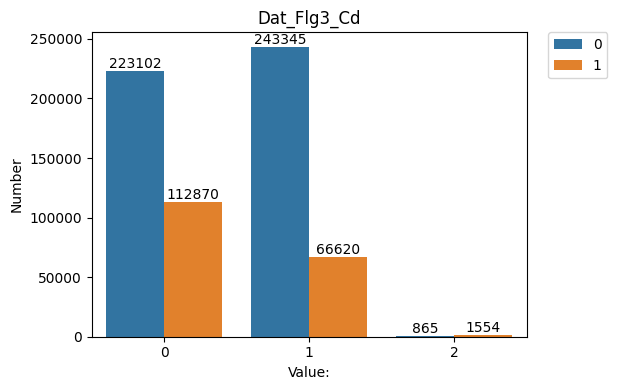

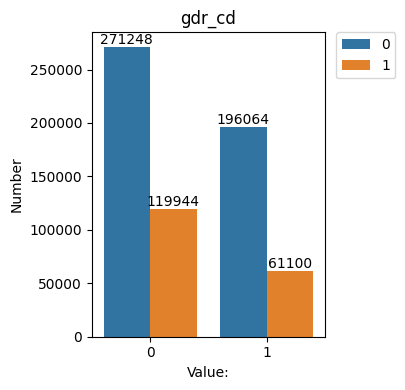

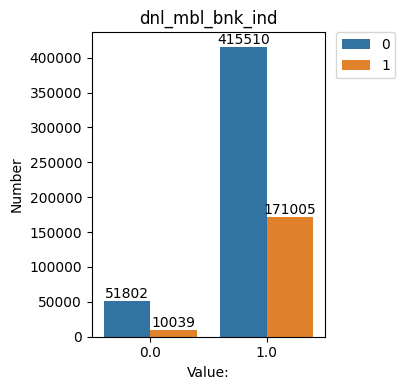

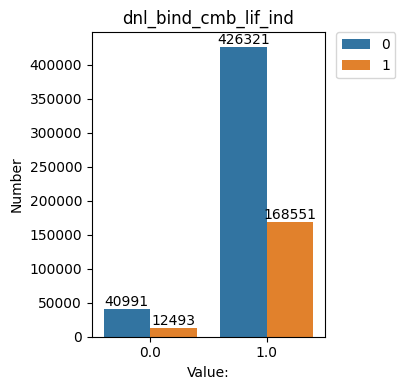

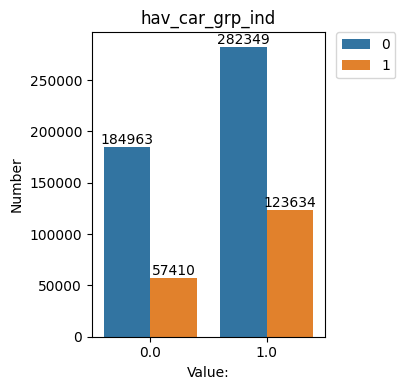

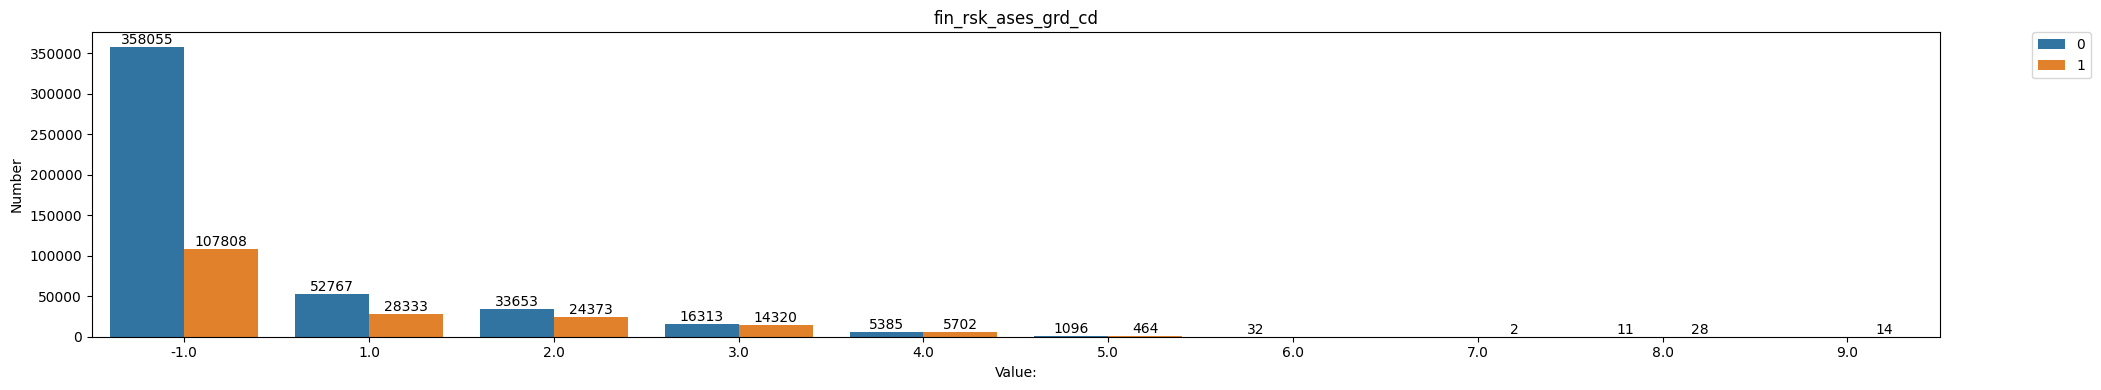

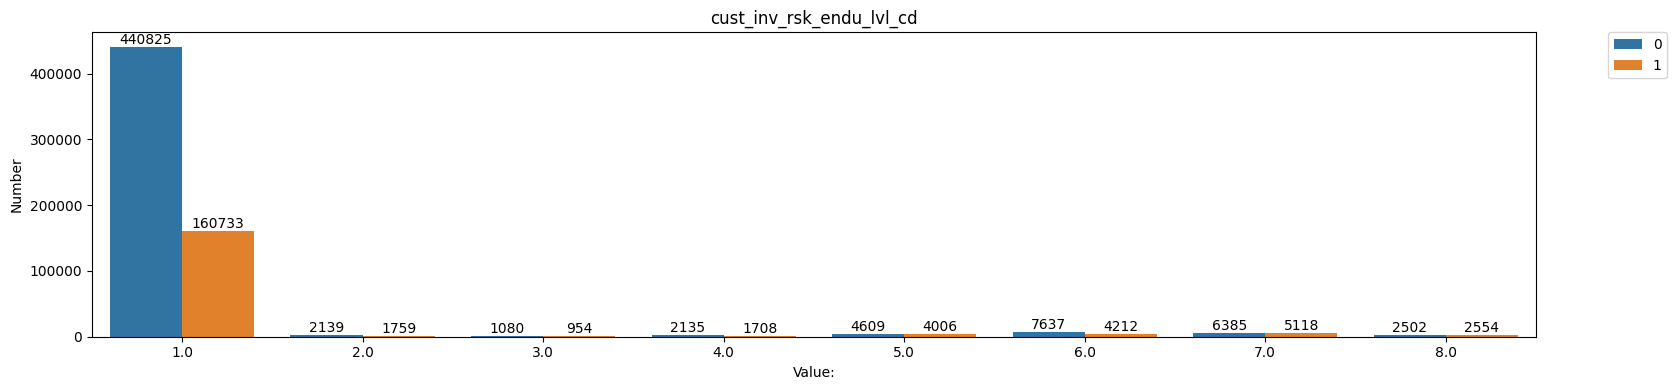

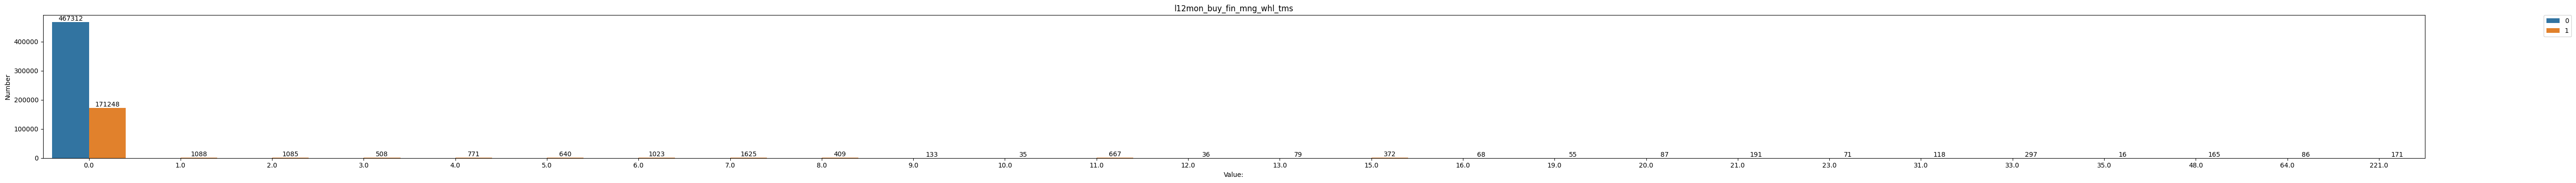

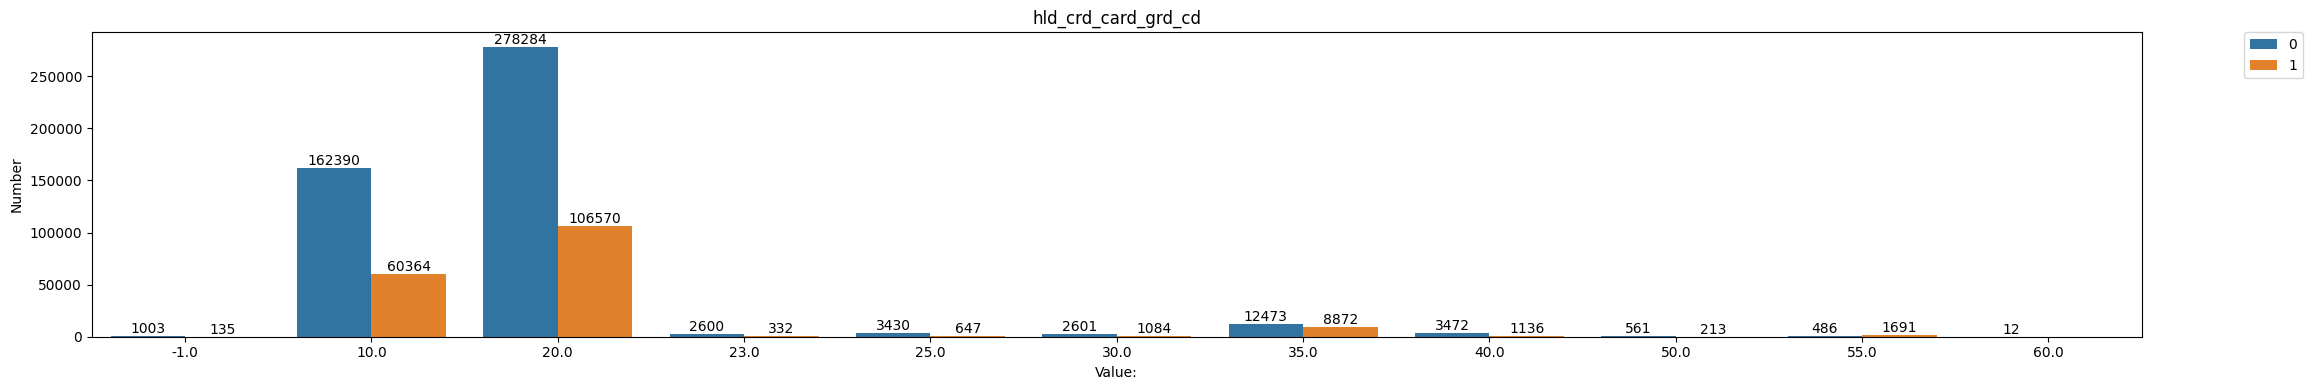

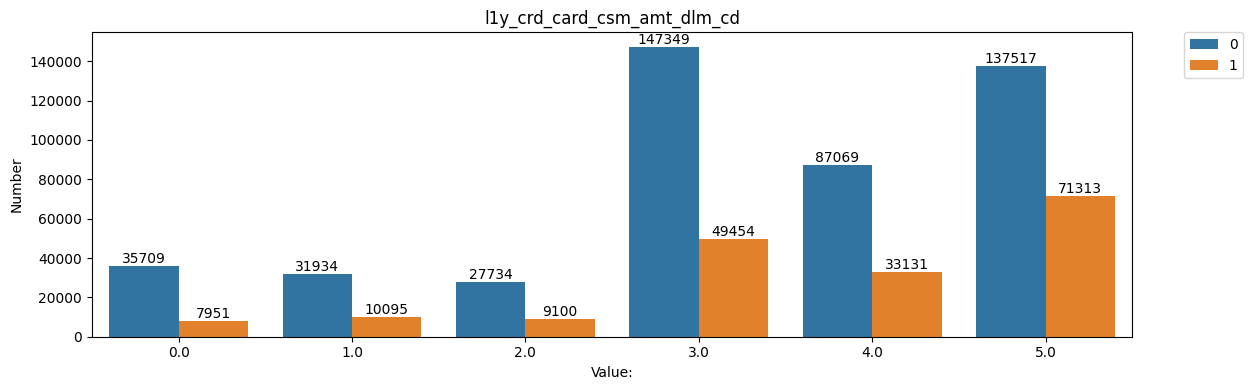

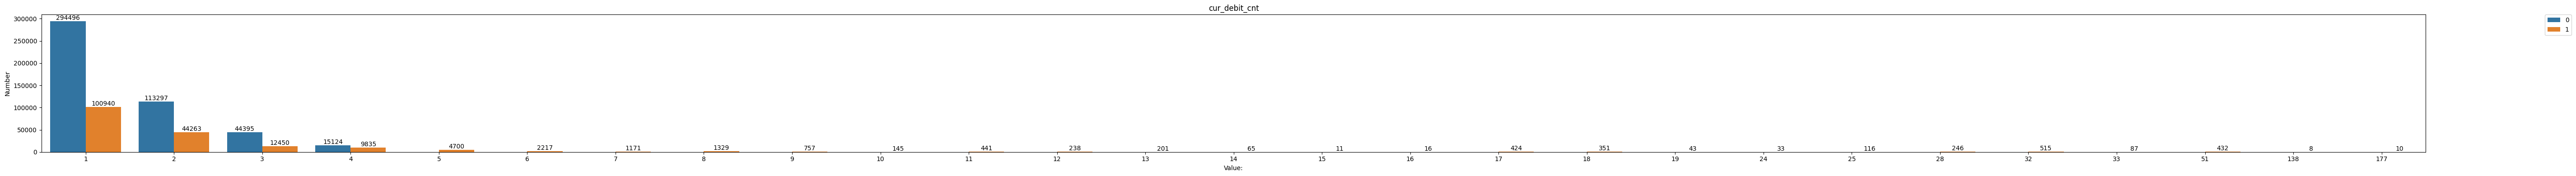

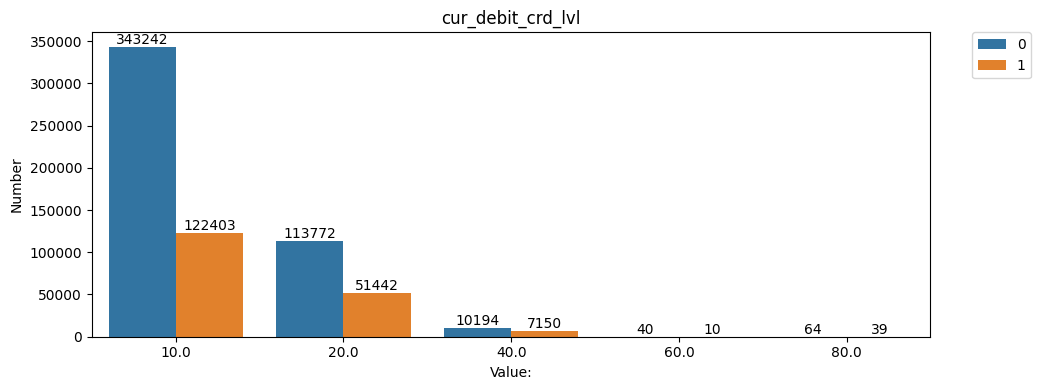

In [88]:
for i in ['Dat_Flg3_Cd','gdr_cd', 'dnl_mbl_bnk_ind', 'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind', 'fin_rsk_ases_grd_cd', 'cust_inv_rsk_endu_lvl_cd',
          'l12mon_buy_fin_mng_whl_tms', 'hld_crd_card_grd_cd', 'l1y_crd_card_csm_amt_dlm_cd', 'cur_debit_cnt', 'cur_debit_crd_lvl']:
  ax1 = sns.countplot(x=i, hue='flag', data=data)
  ax1.set_xlabel('Value:')
  ax1.set_ylabel('Number')
  ax1.set_title(i)
  plt.gcf().set_size_inches(len(data[i].unique()) * 2.1, 4)

  for container in ax1.containers:
    ax1.bar_label(container)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  plt.tight_layout()
  plt.show()

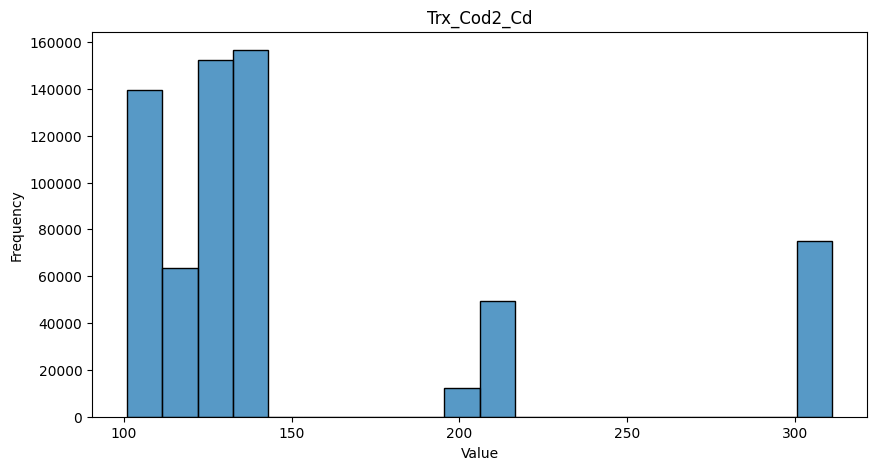

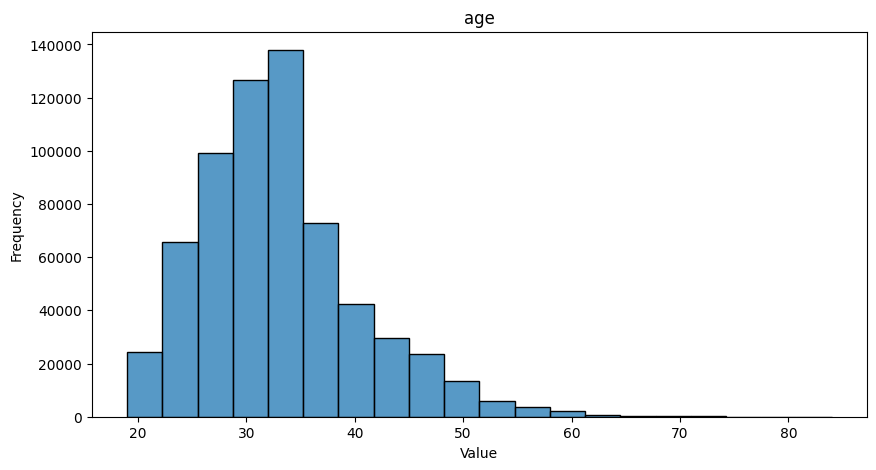

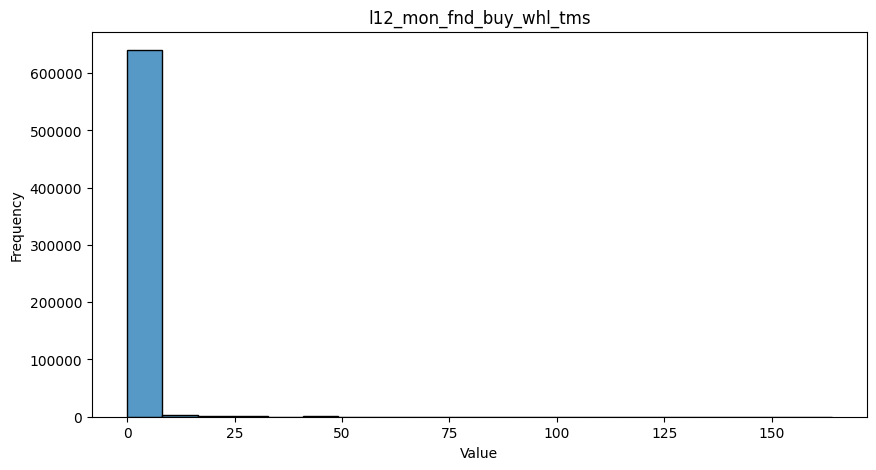

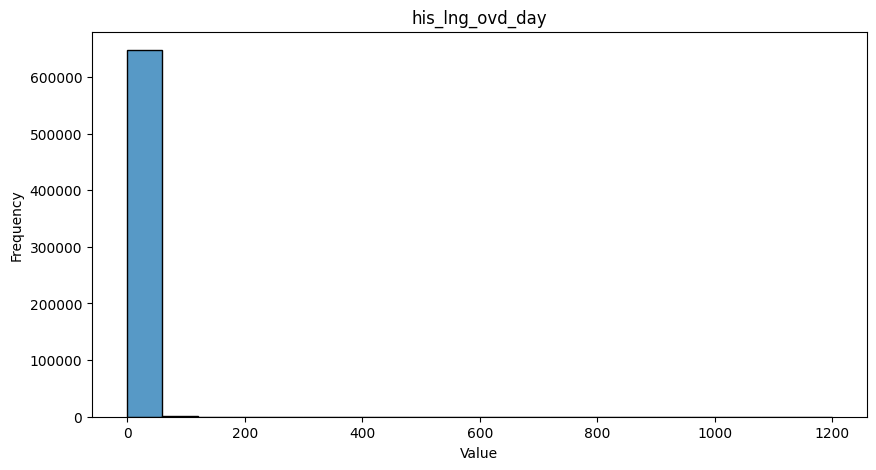

In [91]:
for i in ['Trx_Cod2_Cd', 'age', 'l12_mon_fnd_buy_whl_tms', 'his_lng_ovd_day']:
  plt.figure(figsize=(10,5))
  ax2 = sns.histplot(data[i], bins=20)
  ax2.set_xlabel('Value')
  ax2.set_ylabel('Frequency')
  ax2.set_title(i)

# **PREDICTION**

In [32]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data.drop(columns=['flag'], axis=1)
    features = X.columns

    y = data['flag']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    #MinMax Scaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [33]:
X_train, X_test, y_train, y_test = preprocess_data(data)

In [57]:
X_train = pd.DataFrame(X_train, columns = ['Dat_Flg3_Cd', 'Trx_Cod2_Cd', 'gdr_cd', 'age', 'dnl_mbl_bnk_ind', 'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind',
                                           'fin_rsk_ases_grd_cd', 'cust_inv_rsk_endu_lvl_cd', 'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms',
                                           'his_lng_ovd_day', 'hld_crd_card_grd_cd', 'l1y_crd_card_csm_amt_dlm_cd', 'cur_debit_cnt', 'cur_debit_crd_lvl'])
X_test = pd.DataFrame(X_test, columns = ['Dat_Flg3_Cd', 'Trx_Cod2_Cd', 'gdr_cd', 'age', 'dnl_mbl_bnk_ind', 'dnl_bind_cmb_lif_ind', 'hav_car_grp_ind',
                                         'fin_rsk_ases_grd_cd', 'cust_inv_rsk_endu_lvl_cd', 'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms',
                                         'his_lng_ovd_day', 'hld_crd_card_grd_cd', 'l1y_crd_card_csm_amt_dlm_cd', 'cur_debit_cnt', 'cur_debit_crd_lvl'])

***1.Random Forest***

*tốt*

In [58]:
model_RF = RandomForestClassifier(n_estimators=200, random_state=42, class_weight = 'balanced')
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    373873
           1       0.91      0.97      0.94    144811

    accuracy                           0.96    518684
   macro avg       0.95      0.97      0.96    518684
weighted avg       0.97      0.96      0.96    518684

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     93439
           1       0.89      0.93      0.91     36233

    accuracy                           0.95    129672
   macro avg       0.93      0.94      0.94    129672
weighted avg       0.95      0.95      0.95    129672



In [92]:
#Cross Val
cv_scores = cross_val_score(model_RF, X_train, y_train, cv=5, scoring='accuracy')

# In ra kết quả của từng fold
print("Cross-validation scores:", cv_scores)

# In ra điểm trung bình và độ lệch chuẩn
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV score:", cv_scores.std())

Cross-validation scores: [0.94654752 0.94775249 0.94744402 0.94728978 0.9456987 ]
Mean CV score: 0.9469465006674508
Standard deviation of CV score: 0.0007390781836355262


In [68]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model_RF, f)

# Lưu tên cột (nếu X_train là pandas DataFrame)
columns = X_train.columns.tolist()
with open('columns.pkl', 'wb') as f:
    pickle.dump(columns, f)

***2.XGBOOST***

*Cũng tốt nhưng có vẻ không được như RF*

In [35]:
model_XGB = xgb.XGBClassifier(n_estimators=200, random_state=42)
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93    373873
           1       0.92      0.70      0.79    144811

    accuracy                           0.90    518684
   macro avg       0.91      0.84      0.86    518684
weighted avg       0.90      0.90      0.89    518684

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     93439
           1       0.91      0.69      0.79     36233

    accuracy                           0.90    129672
   macro avg       0.90      0.83      0.86    129672
weighted avg       0.90      0.90      0.89    129672



***3.SMOTE với Random Forest***

*Tập train thì có cải thiện nhưng tập test thì không*

In [ ]:
# Áp dụng SMOTE để tăng cường lớp 1
class_counts = y_train.value_counts()
smote = SMOTE(sampling_strategy={1: class_counts[0]}, random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [ ]:
model_RF_2 = RandomForestClassifier(n_estimators=200, random_state=42)
model_RF_2.fit(X_train_resample, y_train_resample)

y_train_pred = model_RF_2.predict(X_train_resample)
y_test_pred = model_RF_2.predict(X_test)

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97    373899
           1       0.97      0.98      0.97    373899

    accuracy                           0.97    747798
   macro avg       0.97      0.97      0.97    747798
weighted avg       0.97      0.97      0.97    747798

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     93413
           1       0.89      0.93      0.91     36259

    accuracy                           0.95    129672
   macro avg       0.93      0.94      0.94    129672
weighted avg       0.95      0.95      0.95    129672



# **CHECKING TEST DATA**

In [69]:
test = pd.read_csv('/content/drive/MyDrive/Datasets/Chinese Credit Card Customers and Fraud Risk/Card-Customers-and-Fraud-Risk-60-days-(TEST).csv')
test

<ipython-input-69-755d6d29f38f>:1: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,31,32,33,34,35,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('/content/drive/MyDrive/Datasets/Chinese Credit Card Customers and Fraud Risk/Card-Customers-and-Fraud-Risk-60-days-(TEST).csv')


,Unnamed: 0,id,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,hav_car_grp_ind,hav_hou_grp_ind,l6mon_agn_ind,frs_agn_dt_cnt,vld_rsk_ases_ind,fin_rsk_ases_grd_cd,confirm_rsk_ases_lvl_typ_cd,cust_inv_rsk_endu_lvl_cd,l6mon_daim_aum_cd,tot_ast_lvl_cd,pot_ast_lvl_cd,bk1_cur_year_mon_avg_agn_amt_cd,l12mon_buy_fin_mng_whl_tms,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,pl_crd_lmt_cd,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,0,U984422,B,B,1,136,2019-06-23 09:39:27,-119.00,M,52,B,NaN,F,NaN,10,0,0,1,0,1,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,10,1,2,0.0,2,1,1,7399,4717,10
1,1,U984422,B,B,1,136,2019-06-27 13:56:11,-360.00,M,52,B,NaN,F,NaN,10,0,0,1,0,1,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,10,1,2,0.0,2,1,1,7399,4717,10
2,2,U984422,B,B,1,136,2019-06-23 09:57:00,-197.00,M,52,B,NaN,F,NaN,10,0,0,1,0,1,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,10,1,2,0.0,2,1,1,7399,4717,10
3,3,U984422,B,B,1,103,2019-06-20 18:16:38,-24.00,M,52,B,NaN,F,NaN,10,0,0,1,0,1,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,10,1,2,0.0,2,1,1,7399,4717,10
4,4,U984422,B,B,1,103,2019-06-16 07:36:50,-7.00,M,52,B,NaN,F,NaN,10,0,0,1,0,1,0,0,-1,0,-1,-1,1,0,-1,6,0,0,0,0,0,0,0,0,0,10,1,2,0.0,2,1,1,7399,4717,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214810,214810,U56A485,C,B,3,309,2019-05-10 14:49:02,2635.04,F,27,A,F,G,~,0,0,0,1,1,0,0,0,651,1,1,1,1,1,-1,5,0,0,0,0,0,0,0,0,0,20,1,4,NaN,3,1,2,696,653,10
214811,214811,U56A485,B,B,1,136,2019-05-10 14:51:29,-2386.00,F,27,A,F,G,~,0,0,0,1,1,0,0,0,651,1,1,1,1,1,-1,5,0,0,0,0,0,0,0,0,0,20,1,4,NaN,3,1,2,696,653,10
214812,214812,U56A485,B,B,1,130,2019-06-01 00:29:46,-5.00,F,27,A,F,G,~,0,0,0,1,1,0,0,0,651,1,1,1,1,1,-1,5,0,0,0,0,0,0,0,0,0,20,1,4,NaN,3,1,2,696,653,10
214813,214813,U806D0C,B,B,1,107,2019-06-24 15:18:52,-23000.00,M,33,B,C,31,~,6,0,0,0,1,0,0,0,-1,0,-1,-1,1,0,-1,-1,0,0,0,0,0,0,0,0,0,20,1,4,NaN,4,1,1,247,249,10


In [70]:
test_cols = data.columns.to_list()
test_cols.remove('flag')

In [71]:
test = test[test_cols]

In [ ]:
test = change_cols_types(test)

In [ ]:
#Mapping thủ công theo thứ tự giá trị: emp_length, home_ownership
def mapping_columns(test, columns_names = ['Dat_Flg3_Cd', 'gdr_cd']):
  # Các ánh xạ giá trị cho các cột khác nhau
    Dat_Flg3_Cd_mapping = {'A': 0, 'B': 1, 'C': 2}

    gdr_cd_mapping = {'M': 0, 'F': 1}

    # Thực hiện ánh xạ cho từng cột trong DataFrame
    mappings = {'Dat_Flg3_Cd':Dat_Flg3_Cd_mapping, 'gdr_cd': gdr_cd_mapping}

    for column in columns_names:
        if column in test.columns and column in mappings:
            test[column] = test[column].map(mappings[column])

    return test
test = mapping_columns(test)

In [74]:
test = test.dropna()

In [75]:
# Tải mô hình
with open('model.pkl', 'rb') as f:
    model_RF = pickle.load(f)

# Tải tên cột đã lưu
with open('columns.pkl', 'rb') as f:
    train_columns = pickle.load(f)

In [76]:
# Dự đoán trên tập test
test_pred = model_RF.predict(test)

In [79]:
test_pred = pd.Series(test_pred)
test_pred.value_counts()

,count
1,192558
0,18859
